In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load telemetry
df = pd.read_csv("/Users/ahmedmajid/Desktop/Digital-Twin-for Smart-Energy-Meters/digital-twin-mvp/data/telemetry.csv")

df.head()

,timestamp,temperature,vibration,pressure
0,2025-12-04T14:45:02.243591,40.20,0.80,101.20
1,2025-12-04T14:45:55.603153,61.51,1.27,94.35
2,2025-12-04T14:45:57.628967,74.76,0.32,90.91
3,2025-12-04T14:45:59.638021,57.14,0.32,98.44
4,2025-12-04T14:46:01.648827,53.13,0.77,95.16


In [29]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              29 non-null     datetime64[ns]
 1   temperature            29 non-null     float64       
 2   vibration              29 non-null     float64       
 3   pressure               29 non-null     float64       
 4   anomaly_overheat       29 non-null     bool          
 5   anomaly_vibration      29 non-null     bool          
 6   anomaly_pressure_low   29 non-null     bool          
 7   anomaly_pressure_high  29 non-null     bool          
 8   anomaly                29 non-null     int64         
 9   temp_roll_mean         29 non-null     float64       
 10  temp_roll_std          29 non-null     float64       
 11  vib_roll_mean          29 non-null     float64       
 12  vib_roll_std           29 non-null     float64       
 13  pres_ro

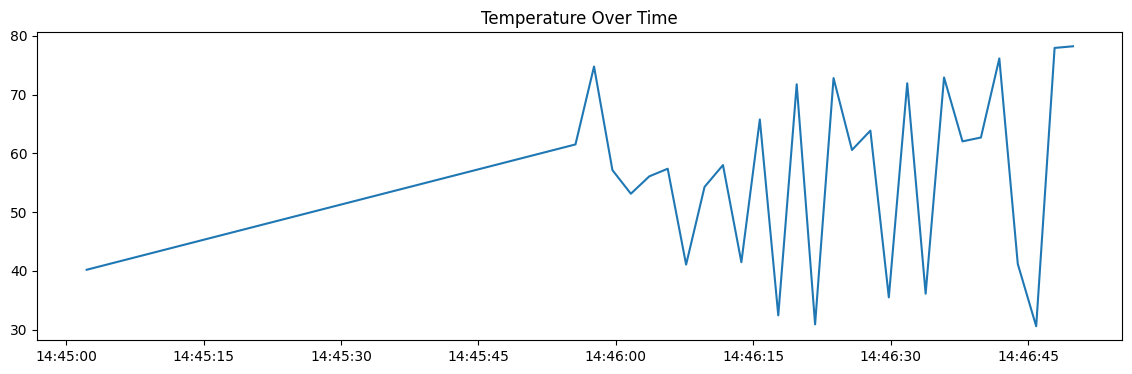

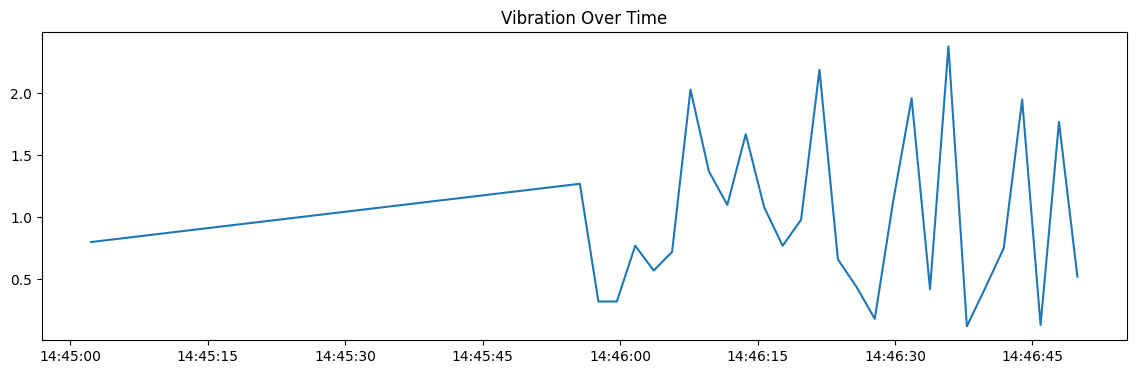

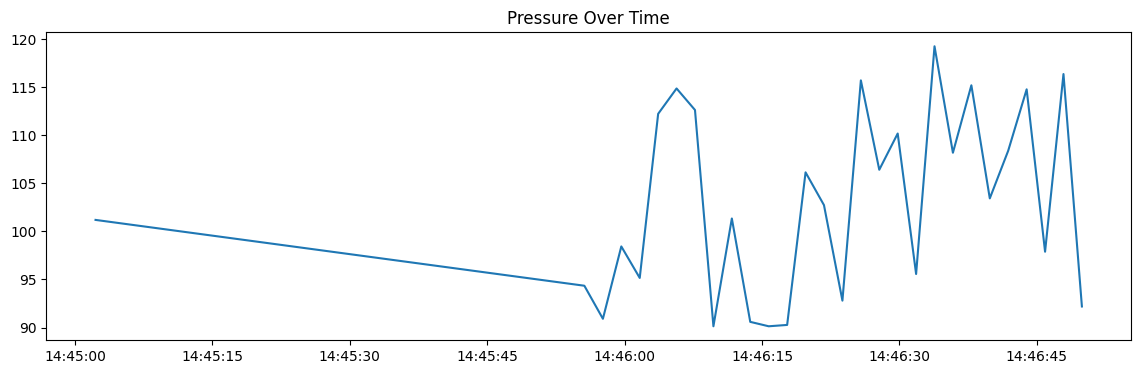

In [35]:
plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['temperature'])
plt.title("Temperature Over Time")
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['vibration'])
plt.title("Vibration Over Time")
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['pressure'])
plt.title("Pressure Over Time")
plt.show()

In [36]:
df['anomaly_overheat'] = df['temperature'] > 70
df['anomaly_vibration'] = df['vibration'] > 2.0
df['anomaly_pressure_low'] = df['pressure'] < 95
df['anomaly_pressure_high'] = df['pressure'] > 115

In [40]:
df['anomaly'] = (
    df['anomaly_overheat'] |
    df['anomaly_vibration'] |
    df['anomaly_pressure_low'] |
    df['anomaly_pressure_high']
).astype(int)

df.head()

,timestamp,temperature,vibration,pressure,anomaly_overheat,anomaly_vibration,anomaly_pressure_low,anomaly_pressure_high,anomaly,temp_roll_mean,temp_roll_std,vib_roll_mean,vib_roll_std,pres_roll_mean,pres_roll_std
0,2025-12-04 14:45:02.243591,40.20,0.80,101.20,False,False,False,False,0,57.348,12.57367,0.696,0.396396,96.012,3.947438
1,2025-12-04 14:45:55.603153,61.51,1.27,94.35,False,False,True,False,1,57.348,12.57367,0.696,0.396396,96.012,3.947438
2,2025-12-04 14:45:57.628967,74.76,0.32,90.91,True,False,True,False,1,57.348,12.57367,0.696,0.396396,96.012,3.947438
3,2025-12-04 14:45:59.638021,57.14,0.32,98.44,False,False,False,False,0,57.348,12.57367,0.696,0.396396,96.012,3.947438
4,2025-12-04 14:46:01.648827,53.13,0.77,95.16,False,False,False,False,0,57.348,12.57367,0.696,0.396396,96.012,3.947438


In [41]:
df['temp_roll_mean'] = df['temperature'].rolling(window=5).mean()
df['temp_roll_std'] = df['temperature'].rolling(window=5).std()

df['vib_roll_mean'] = df['vibration'].rolling(window=5).mean()
df['vib_roll_std'] = df['vibration'].rolling(window=5).std()

df['pres_roll_mean'] = df['pressure'].rolling(window=5).mean()
df['pres_roll_std'] = df['pressure'].rolling(window=5).std()

df = df.fillna(method='bfill')

/var/folders/mx/y44hqtkj3494xz8wqskskb1r0000gn/T/ipykernel_26787/4204173582.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [42]:
df.to_csv("processed_telemetry.csv", index=False)
df.head()

,timestamp,temperature,vibration,pressure,anomaly_overheat,anomaly_vibration,anomaly_pressure_low,anomaly_pressure_high,anomaly,temp_roll_mean,temp_roll_std,vib_roll_mean,vib_roll_std,pres_roll_mean,pres_roll_std
0,2025-12-04 14:45:02.243591,40.20,0.80,101.20,False,False,False,False,0,57.348,12.57367,0.696,0.396396,96.012,3.947438
1,2025-12-04 14:45:55.603153,61.51,1.27,94.35,False,False,True,False,1,57.348,12.57367,0.696,0.396396,96.012,3.947438
2,2025-12-04 14:45:57.628967,74.76,0.32,90.91,True,False,True,False,1,57.348,12.57367,0.696,0.396396,96.012,3.947438
3,2025-12-04 14:45:59.638021,57.14,0.32,98.44,False,False,False,False,0,57.348,12.57367,0.696,0.396396,96.012,3.947438
4,2025-12-04 14:46:01.648827,53.13,0.77,95.16,False,False,False,False,0,57.348,12.57367,0.696,0.396396,96.012,3.947438
